# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSIB/Dataset/clustering_results.csv')
df.head()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M,cluster
0,-0.448736,0.901071,-0.856742,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,-0.248758,-0.211721,...,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,-0.220409,-0.176586,-1.717643,-0.46184,1
1,-0.448736,0.028606,0.522871,-0.342973,-0.369255,0.831172,-0.219597,-0.22691,1.549544,-0.211721,...,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,2.128197,-0.176586,0.582193,-0.46184,1
2,-0.448736,0.117603,0.297628,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,-0.248758,-0.211721,...,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,2.128197,2.664614,0.582193,-0.46184,0
3,-1.344668,1.439152,0.156851,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,-0.248758,-0.211721,...,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,-0.220409,-0.176586,0.582193,-0.46184,1
4,0.447196,-0.634906,-0.828586,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,1.549544,-0.211721,...,5.880349,-0.203392,-0.185396,-0.307826,-0.262037,-0.220409,-0.176586,0.582193,-0.46184,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X = df.drop('cluster', axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9958748710897215
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       244
           1       1.00      1.00      1.00      2155
           2       0.99      1.00      1.00       510

    accuracy                           1.00      2909
   macro avg       0.99      0.99      0.99      2909
weighted avg       1.00      1.00      1.00      2909



In [ ]:
y_pred_dt = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9989687177724303
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       244
           1       1.00      1.00      1.00      2155
           2       1.00      1.00      1.00       510

    accuracy                           1.00      2909
   macro avg       1.00      1.00      1.00      2909
weighted avg       1.00      1.00      1.00      2909



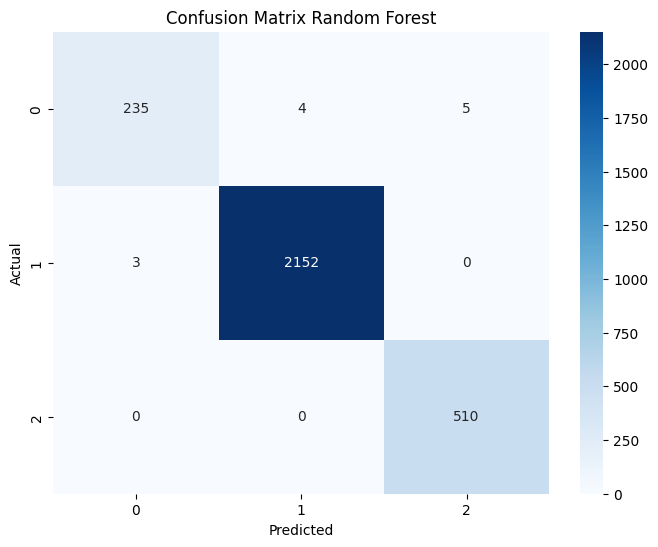

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

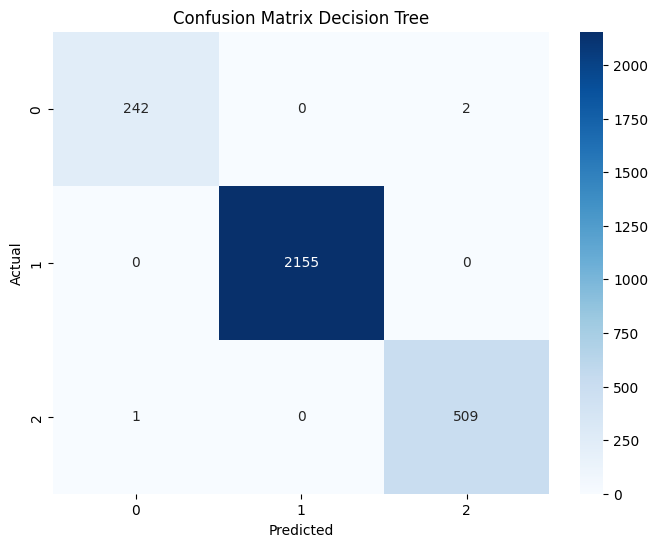

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Berdasarkan hasil pelatihan kedua model tersebut, Decision Tree memiliki kesalahan prediksi yang kecil dibandingkan dengan Random Forest seperti hasil visualisasi confusion matriks yang tertera diatas. Dan hasil akurasinya pun hanya berbeda 0,003 dimana Decision Tree yang paling bagus. Hal tersebut tidak menutup kemungkinan bahwa kedua model mengalami overfiting karena akurasinya hampir menyentuh nilai 1. Oleh karena itu perlu dilakukan Tunning untuk memastikan model tersebut tidak overfittng.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

print("Best hyperparameters for RandomForestClassifier:", rf_random_search.best_params_)
print("Best accuracy for RandomForestClassifier:", rf_random_search.best_score_)

Best hyperparameters for RandomForestClassifier: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best accuracy for RandomForestClassifier: 0.9944143677167924


In [ ]:
dt_param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_random_search = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=dt_param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

dt_random_search.fit(X_train, y_train)

print("\nBest hyperparameters for DecisionTreeClassifier:", dt_random_search.best_params_)
print("Best accuracy for DecisionTreeClassifier:", dt_random_search.best_score_)


Best hyperparameters for DecisionTreeClassifier: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
Best accuracy for DecisionTreeClassifier: 0.9995703359782148


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
best_rf_classifier = RandomForestClassifier(**rf_random_search.best_params_, random_state=42)
best_rf_classifier.fit(X_train, y_train)

y_pred_rf_tuned = best_rf_classifier.predict(X_test)

accuracy_tuned_rf = accuracy_score(y_test, y_pred_rf_tuned)
print(f"\nAccuracy of Tuned Random Forest Classifier: {accuracy_tuned_rf}")
print(classification_report(y_test, y_pred_rf_tuned))


Accuracy of Tuned Random Forest Classifier: 0.9955311103471983
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       244
           1       1.00      1.00      1.00      2155
           2       0.99      1.00      1.00       510

    accuracy                           1.00      2909
   macro avg       0.99      0.98      0.99      2909
weighted avg       1.00      1.00      1.00      2909



In [ ]:
best_dt_classifier = DecisionTreeClassifier(**dt_random_search.best_params_, random_state=42)
best_dt_classifier.fit(X_train, y_train)

y_pred_dt_tuned = best_dt_classifier.predict(X_test)

accuracy_tuned_dt = accuracy_score(y_test, y_pred_dt_tuned)
print(f"\nAccuracy of Tuned Decision Tree Classifier: {accuracy_tuned_dt}")
print(classification_report(y_test, y_pred_dt_tuned))


Accuracy of Tuned Decision Tree Classifier: 0.9986249570299072
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       244
           1       1.00      1.00      1.00      2155
           2       0.99      1.00      1.00       510

    accuracy                           1.00      2909
   macro avg       1.00      1.00      1.00      2909
weighted avg       1.00      1.00      1.00      2909



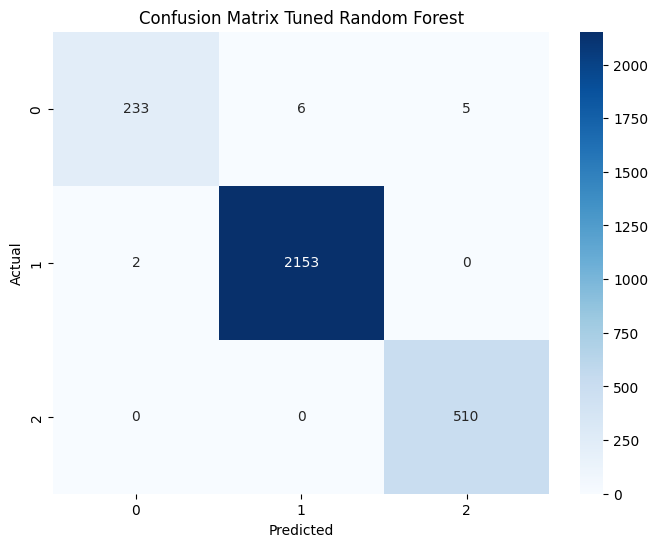

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Tuned Random Forest')
plt.show()

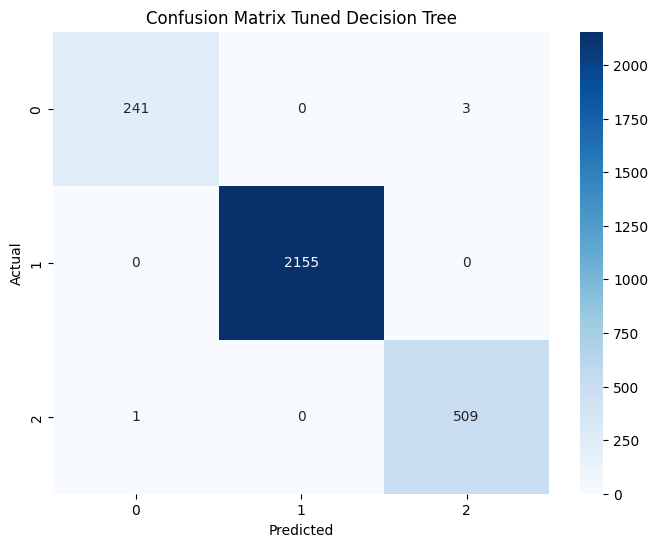

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Tuned Decision Tree')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Setelah dilakukan tunning ternyata model mengalami penurunan akurasi yang tidak signifikan. Decision Tree tetap memiliki akurasi yang lebih tinggi darpada Random Forest. Penurunan tersebut mungkin karena sebelum tunning, kedua model mengalami overfiting. Setelah tunning, model lebih mengeneralisasi data tetapi hanya sedikit perubahan karena metode tunning yang digunakkan adalah RandomSearchCv yang kurang maksimal dalam menemukan parameter terbaik agar tidak overfiting maupun underfiting